
### **Talktorial: DYNAMIC MODELING IN SYSTEMS BIOLOGY**



## **Authors**
- Saransh
- Rimash



## **Aim of the Talktorial**
This talktorial introduces how to model dynamical systems in Chemical Reaction Networks (CRNs) using Ordinary Differential Equations (ODEs). We describe how ODEs can represent chemical reactions, such as enzymatic processes or drug-receptor interactions. Python will be utilized to simulate and visualize these models.



## **1. Introduction**

### **Goal:**
To establish the relevance of CRNs in **computational biology** and their applications.

### **Topics Covered:**
- **Definition of CRNs and Examples:**
  - CRNs are structured systems of chemical reactions that describe changes in molecular concentrations over time. These systems are commonly applied to study biological processes such as enzymatic reactions and metabolic pathways.
  
**Example Reaction:**
    $$
    E + S \rightleftharpoons C \rightarrow E + P
    $$
    - Enzyme (E) binds to substrate (S) forming a complex (C), which subsequently converts into product (P) while releasing the enzyme.

- **Importance in Studying Drug-Receptor Interactions:**
  - CRNs are fundamental in understanding the kinetics of how drugs interact with biological receptors, offering insights into binding affinities and inhibitory effects.

- **Overview of Methodologies:**
  - The use of Ordinary Differential Equations (ODEs) to model CRNs, simulate reaction kinetics, and analyze steady-state and transient dynamics.


## **2. Basics of Dynamical Systems in CRNs**

### **Key Concepts**

1. **Chemical Species**:
   - Chemical species in a CRN include **reactants**, **intermediates**, and **products**. These species interact through reactions, which are characterized by specific rate constants.

2. **Reactions and Rate Constants**:
   - Each chemical reaction in a CRN is associated with a **rate constant** \( k \), which quantifies how fast the reaction occurs. For example, the rate at which reactants convert to products is governed by the rate constant.

3. **Reaction Networks**:
   - A **reaction network** consists of a set of interconnected reactions. These reactions form a dynamic system where the concentration of each species changes over time.

---

### **Dynamical Systems**

#### **Modeling Concentrations Over Time Using ODEs**

To model how the concentration of a chemical species changes over time, we use **Ordinary Differential Equations (ODEs)**. For instance, consider the dynamics of an enzyme (\([E]\)), substrate (\([S]\)), and the enzyme-substrate complex (\([C]\)) in a simple CRN:

$$
\frac{d[E]}{dt} = -k_1[E][S] + k_2[C] + k_3[C],
$$

- The term \( -k_1[E][S] \) represents the consumption of enzyme and substrate to form the enzyme-substrate complex.
- The terms \( k_2[C] \) and \( k_3[C] \) account for the breakdown of the enzyme-substrate complex, where it either returns to the enzyme and substrate or produces the product.

#### **Mass-Action Kinetics**

In mass-action kinetics, the rate of a reaction depends on the concentrations of the reactants. For the enzyme-substrate complex, the rate of change of the complex’s concentration is given by:

$$
\frac{d[C]}{dt} = k_1[E][S] - k_2[C] - k_3[C],
$$

- The term \( k_1[E][S] \) represents the formation of the enzyme-substrate complex.
- The terms \( -k_2[C] \) and \( -k_3[C] \) represent the consumption of the complex, either dissociating back into the enzyme and substrate or breaking down to form the product.

These equations reflect the law of mass action, where the rate of a reaction is proportional to the concentrations of the reactants.

---

#### **Michaelis-Menten Mechanism**

In enzyme kinetics, the **Michaelis-Menten mechanism** describes how enzymes interact with substrates. The mechanism involves two main steps:

1. **Binding**: The enzyme \(E\) binds with the substrate \(S\) to form the enzyme-substrate complex \(C\):

   $$
   E + S \rightleftharpoons C
   $$

2. **Reaction**: The enzyme-substrate complex \(C\) undergoes a reaction to release the enzyme \(E\) and produce the product \(P\):

   $$
   C \rightarrow E + P
   $$

This mechanism is used to describe many enzyme-catalyzed reactions and leads to a set of rate equations for the concentrations of \(E\), \(S\), and \(C\).

---

### **Summary**

- The dynamics of chemical species in a CRN can be described using ODEs, with the rates of change dependent on the concentrations of reactants and intermediates.
- **Mass-action kinetics** and the **Michaelis-Menten mechanism** provide a foundation for modeling these systems and understanding enzyme-substrate interactions.


## **3. Integration of ODEs**

### **Key Concepts**

#### **Euler's Method**

Euler's method provides a numerical approximation to the solution of an ordinary differential equation (ODE) of the form:

$$
\frac{dy}{dt} = f(t, y), \quad y(t_0) = y_0.
$$

The iterative formula for Euler's method is:

$$
y_{n+1} = y_n + h \cdot f(t_n, y_n),
$$

where:
- \( y_n \): Approximate value of \( y \) at time \( t_n \),
- \( h \): Step size,
- \( f(t_n, y_n) \): Slope (right-hand side of the ODE) evaluated at \( t_n \).

---

### **Shortcomings of Euler's Method**

1. **Assumption of Linearity**:
   - Euler's method assumes linear behavior within a step. This can lead to inaccuracies for stiff or highly nonlinear systems.

2. **Step Size Sensitivity**:
   - The accuracy of the method depends on the choice of \( h \). Larger step sizes introduce larger errors, while smaller step sizes increase computational cost.

3. **Accumulation of Errors**:
   - Local truncation errors at each step can accumulate, resulting in significant global errors over time.

4. **Inefficiency for Stiff Systems**:
   - For stiff ODEs, Euler's method often requires very small step sizes to maintain stability and accuracy.


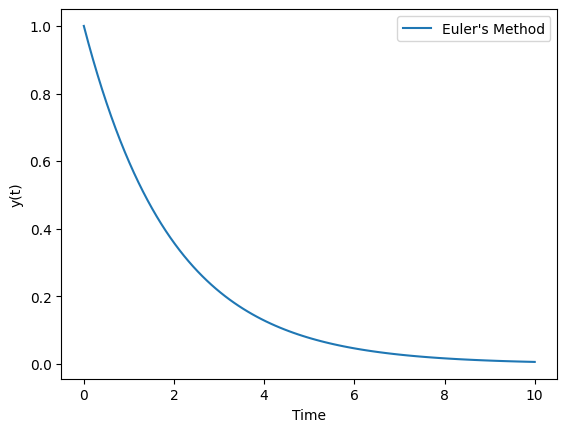

In [2]:

import numpy as np
import matplotlib.pyplot as plt

def euler_method(f, y0, t):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        y[i] = y[i-1] + (t[i] - t[i-1]) * f(t[i-1], y[i-1])
    return y

def dydt(t, y):
    return -0.5 * y  # Example: Exponential decay

# Parameters
t = np.linspace(0, 10, 100)
y0 = 1

# Solve
y = euler_method(dydt, y0, t)

# Plot
plt.plot(t, y, label="Euler's Method")
plt.xlabel("Time")
plt.ylabel("y(t)")
plt.legend()
plt.show()


## **Exponential Decay and Euler’s Method**

This plot shows how a quantity, \( y(t) \), decreases over time according to a rule: the faster the value decreases, the smaller it gets. This behavior is known as **exponential decay**.

---

### **How It Works**

The governing equation is:

$$
\frac{dy}{dt} = -0.5 \cdot y.
$$

This means that \( y(t) \) shrinks at a rate proportional to its current value, \( -0.5 \cdot y \).

---

### **How We Solve It**

Using **Euler’s Method**, we calculate \( y(t) \) step by step:

1. **Start with an initial value**: \( y_0 \).

2. **Use the formula**:

   $$
   y_{\text{next}} = y_{\text{current}} + h \cdot \text{rate of change},
   $$

   where:
   - \( h \) is the step size (the time increment),
   - \(\text{rate of change} = -0.5 \cdot y_{\text{current}}\).

3. **Repeat** to get values of \( y \) at later times.

---

### **Step-by-Step Process**

1. Begin at \( t_0 \) with \( y_0 \).
2. Compute the rate of change at \( y_{\text{current}} \) using \( -0.5 \cdot y_{\text{current}} \).
3. Update \( y_{\text{next}} \) using the formula:

   $$
   y_{\text{next}} = y_{\text{current}} + h \cdot (-0.5 \cdot y_{\text{current}}).
   $$

4. Increment \( t \) by the step size \( h \) and repeat.

---

This iterative process allows us to approximate the solution \( y(t) \) over time.




## **4. Impact of Rate Parameters**


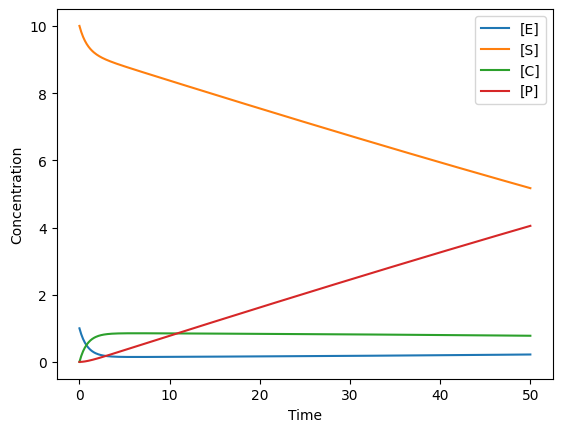

In [3]:

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def crn_model(y, t, k1, k2, k3):
    E, S, C, P = y
    dE_dt = -k1 * E * S + k2 * C + k3 * C
    dS_dt = -k1 * E * S + k2 * C
    dC_dt = k1 * E * S - (k2 + k3) * C
    dP_dt = k3 * C
    return [dE_dt, dS_dt, dC_dt, dP_dt]

# Initial conditions
E0, S0, C0, P0 = 1.0, 10.0, 0.0, 0.0

# Time points
t = np.linspace(0, 50, 500)

# Rate constants
k1, k2, k3 = 0.1, 0.05, 0.1

# Solving ODE
solution = odeint(crn_model, [E0, S0, C0, P0], t, args=(k1, k2, k3))
E, S, C, P = solution.T

# Plotting results
plt.plot(t, E, label="[E]")
plt.plot(t, S, label="[S]")
plt.plot(t, C, label="[C]")
plt.plot(t, P, label="[P]")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()


## **Enzymatic Reaction Dynamics**

This plot illustrates how four key components of an enzymatic reaction change over time:

---

### **Components**

1. **Enzyme (\([E]\), Blue)**:
   - The enzyme facilitates the reaction by binding to the substrate, forming a temporary complex.
   - Its concentration decreases slightly at first but recovers as it is recycled.

2. **Substrate (\([S]\), Red)**:
   - The substrate is the starting material that reacts with the enzyme.
   - Its concentration decreases steadily as it is converted into the product.

3. **Enzyme-Substrate Complex (\([C]\), Green)**:
   - This complex forms when the enzyme binds to the substrate.
   - Its concentration increases initially, then stabilizes as the reaction reaches a balance.

4. **Product (\([P]\), Purple)**:
   - The product is the outcome of the reaction.
   - Its concentration increases steadily as the substrate is consumed.

---

### **What’s Happening in the Reaction?**

#### **1. Binding**

The enzyme (\(E\)) and substrate (\(S\)) combine to form the enzyme-substrate complex (\(C\)):

$$
E + S \rightarrow C
$$

---

#### **2. Reaction**

The enzyme-substrate complex (\(C\)) breaks down to release the enzyme (\(E\)) and produce the product (\(P\)):

$$
C \rightarrow E + P
$$

---

#### **3. Recycling**

The enzyme (\(E\)) is free to bind to more substrate, allowing the process to repeat.

---

This step-by-step process highlights how the enzymatic reaction progresses over time, with each component dynamically changing as the reaction proceeds.


### Interactive Simulation: Enzyme-Substrate Reaction

Adjust the rate constants \( k_1, k_2, \) and \( k_3 \) and observe how the concentrations of species change over time.




In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Define the CRN model
def crn_model(y, t, k1, k2, k3):
    E, S, C, P = y
    dE_dt = -k1 * E * S + k2 * C + k3 * C
    dS_dt = -k1 * E * S + k2 * C
    dC_dt = k1 * E * S - (k2 + k3) * C
    dP_dt = k3 * C
    return [dE_dt, dS_dt, dC_dt, dP_dt]

# Initial conditions
E0, S0, C0, P0 = 1.0, 10.0, 0.0, 0.0

# Time points
t = np.linspace(0, 50, 500)

# Interactive function
def simulate_crn(k1=0.1, k2=0.05, k3=0.1):
    solution = odeint(crn_model, [E0, S0, C0, P0], t, args=(k1, k2, k3))
    E, S, C, P = solution.T

    plt.figure(figsize=(8, 5))
    plt.plot(t, E, label="[E] (Enzyme)")
    plt.plot(t, S, label="[S] (Substrate)")
    plt.plot(t, C, label="[C] (Complex)")
    plt.plot(t, P, label="[P] (Product)")
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.title("Enzyme-Substrate Reaction Dynamics")
    plt.legend()
    plt.show()

# Create interactive sliders
interact(simulate_crn, k1=(0.01, 1.0, 0.01), k2=(0.01, 1.0, 0.01), k3=(0.01, 1.0, 0.01));

interactive(children=(FloatSlider(value=0.1, description='k1', max=1.0, min=0.01, step=0.01), FloatSlider(valu…


## **6. Application: Calcium Oscillations**

### **High-Level Explanation:**

#### **What are Calcium Oscillations?**
- Calcium oscillations refer to the rhythmic changes in calcium ion (\( \text{Ca}^{2+} \)) concentrations within cells over time.
- These oscillations play a critical role in various biological processes, such as:
  - **Muscle Contraction**: Calcium signals trigger muscles to contract and relax.
  - **Neurotransmission**: Calcium ions help transmit signals between neurons.
  - **Immune Responses**: Calcium regulates the activation and movement of immune cells.

#### **Why Do Oscillations Happen?**
- Oscillatory behavior is caused by feedback loops in **Chemical Reaction Networks (CRNs)**. For example:
  - **Positive Feedback**: Increases calcium release, amplifying the signal.
  - **Negative Feedback**: Helps reduce calcium levels, ensuring oscillations don't go out of control.
- These feedback mechanisms create a repeating cycle of calcium release and uptake, resulting in the oscillations observed.

---


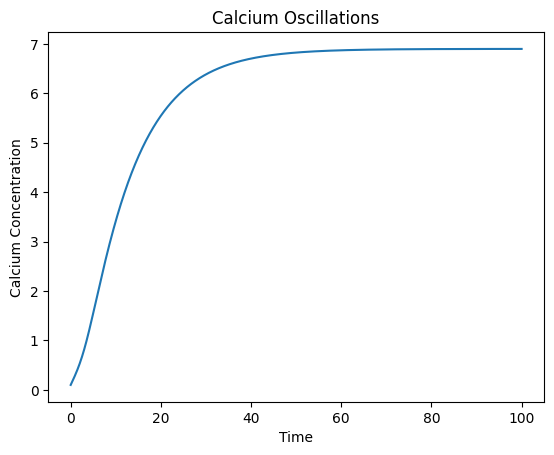

In [4]:

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def calcium_model(C, t, k_on, k_off, feedback):
    dC_dt = k_on - k_off * C + feedback * (C**2 / (1 + C**2))
    return dC_dt

# Parameters
t = np.linspace(0, 100, 1000)
C0 = 0.1  # Initial calcium concentration
k_on = 0.2
k_off = 0.1
feedback = 0.5

# Solve ODE
C = odeint(calcium_model, C0, t, args=(k_on, k_off, feedback))

# Plot results
plt.plot(t, C)
plt.xlabel("Time")
plt.ylabel("Calcium Concentration")
plt.title("Calcium Oscillations")
plt.show()


## **Calcium Oscillations: Dynamics Over Time**

This plot shows how calcium levels in a system change over time. Initially, calcium levels are low, but they rise and eventually settle into a stable oscillatory pattern. This behavior is controlled by a balance of key processes:

---

### **Key Processes**

1. **Calcium Influx ($k_{\text{on}}$)**:
   - Represents calcium "flowing in" to the system, which increases the calcium level.

2. **Calcium Efflux ($k_{\text{off}} \cdot C$)**:
   - Represents calcium "flowing out" of the system, which decreases the calcium level.
   - The efflux depends on the current calcium concentration ($C$).

3. **Feedback Mechanism**:
   - A special mechanism that boosts calcium levels when they reach a certain threshold.
   - This feedback creates a "push" that helps maintain or amplify the oscillatory behavior.

